In [27]:
import os 
import glob 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

In [28]:
path = './data/ccm_rul_dataset.csv'

In [29]:
df = pd.read_csv(path)


In [30]:
import datetime as dt

df['time_temperature_measurement'] = df['date'] + " " + df['time_temperature_measurement1']
df['sample_time_continuous_caster'] = df['date'] + " " + df['sample_time_continuous_caster']

# df['time_temperature_measurement'] = pd.to_datetime(df['time_temperature_measurement'] )        # .dt.time
df['sample_time_continuous_caster'] = pd.to_datetime(df['sample_time_continuous_caster'] )      # .dt.time

df['date'] = pd.to_datetime(df['date'])

cols = ['date', 
        # 'time_temperature_measurement',                 # 온도 측정 시간 
        'sample_time_continuous_caster',                # 연속주조(연주) 샘플 뽑았을 때 시간?  
        'steel_type',                                   # 철강 제품 타입 
        'doc_requirement',                              # 제품별 요구조건
        # 'temperature_measurement1, Celsius deg.',       # 측정된 온도 1
        # 'temperature_measurement2, Celsius deg.',       # 측정된 온도 2 
        'workpiece_weight, tonn', 
       'cast_in_row', 'workpiece_slice_geometry', 'alloy_type',
       'steel_weight_theoretical, tonn', 'slag_weight_close_grab1, tonn',
       'metal_residue_grab1, tonn', 'steel_weight, tonn',
       'residuals_grab2, tonn', 'technical_trim, tonn', 'grab1_num',
       'steel_temperature_grab1, Celsius deg.', 'grab2_num',
       'resistance, tonn', 'swing_frequency, amount/minute',
       'crystallizer_movement, mm', 'alloy_speed, meter/minute',
       'water_consumption, liter/minute',
       'water_temperature_delta, Celsius deg.',
       'water_consumption_secondary_cooling_zone_num1, liter/minute',
       'water_consumption_secondary_cooling_zone_num2, liter/minute',
       'water_consumption_secondary_cooling_zone_num3, liter/minute', 'kind',
       'quantity, tonn', 
       'Ce, %', 'C, %', 'Si, %', 'Mn,%',
       'S, %', 'P, %', 'Cr, %', 'Ni, %', 'Cu, %', 'As, %', 'Mo, %', 'Nb, %',
       'Sn, %', 'Ti, %', 'V, %', 'Al, %', 'Ca, %', 'N, %', 'Pb, %', 'Mg, %',
       'Zn, %', 'sleeve', 'num_crystallizer', 'num_stream', 'RUL']

df = df[cols]
df = df.sort_values(by='sample_time_continuous_caster')

df.head()
# 짧은 시간 차이로 온도 측정하고 다음 연주 샘플 시간이 정해짐 

,date,sample_time_continuous_caster,steel_type,doc_requirement,"workpiece_weight, tonn",cast_in_row,workpiece_slice_geometry,alloy_type,"steel_weight_theoretical, tonn","slag_weight_close_grab1, tonn",...,"Al, %","Ca, %","N, %","Pb, %","Mg, %","Zn, %",sleeve,num_crystallizer,num_stream,RUL
35,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,18,150x150,open,164.2,1.8,...,0.0039,0.0007,0.0037,0.0,0.0,0.0,30013346,2,1,814.0
28,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,18,150x150,open,164.2,1.8,...,0.0039,0.0007,0.0037,0.0,0.0,0.0,30013350,5,2,0.0
21,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,18,150x150,open,164.2,1.8,...,0.0039,0.0007,0.0037,0.0,0.0,0.0,30012261,22,4,0.0
6,2020-01-05,2020-01-05 03:22:05,Arm240,DOC 34028-2016,163.8,5,150x150,open,164.2,1.8,...,0.0032,0.0011,0.0046,0.0,0.0,0.0,30012261,22,4,577.0
42,2020-01-05,2020-01-05 03:22:05,Arm240,DOC 34028-2016,163.8,5,150x150,open,164.2,1.8,...,0.0032,0.0011,0.0046,0.0,0.0,0.0,30013350,5,2,592.0


In [31]:
df.iloc[:,:25].isnull().sum()

date                                                               0
sample_time_continuous_caster                                      0
steel_type                                                         0
doc_requirement                                                    0
workpiece_weight, tonn                                             0
cast_in_row                                                        0
workpiece_slice_geometry                                           0
alloy_type                                                         0
steel_weight_theoretical, tonn                                     0
slag_weight_close_grab1, tonn                                      0
metal_residue_grab1, tonn                                          0
steel_weight, tonn                                                 0
residuals_grab2, tonn                                          16990
technical_trim, tonn                                           17427
grab1_num                         

In [32]:
df.iloc[:,25:].isnull().sum()

water_consumption_secondary_cooling_zone_num3, liter/minute       14
kind                                                            2263
quantity, tonn                                                  2263
Ce, %                                                           5430
C, %                                                               0
Si, %                                                              0
Mn,%                                                               0
S, %                                                               0
P, %                                                               0
Cr, %                                                              0
Ni, %                                                              0
Cu, %                                                              0
As, %                                                             10
Mo, %                                                             12
Nb, %                             

In [33]:
for col in df.columns:
    uniq_val = len(df[col].unique())
    if uniq_val == 1:
        print(col)
# 단일 값을 갖는다 

slag_weight_close_grab1, tonn


In [34]:

'''
1. 단일 값을 갖는 컬럼은 제거한다.

전체 17,503개의 데이터 중 10,000개 이상 Null값을 갖는 컬럼은 제거한다 
- residuals_grab2, tonn
- technical_trim, tonn
- Sn, %

'''
data = df.drop(labels=['slag_weight_close_grab1, tonn', 'kind', 'residuals_grab2, tonn', 'technical_trim, tonn', 'Sn, %'],axis=1)

In [35]:

data['workpiece_slice_geometry'] = data['workpiece_slice_geometry'].map({'150x150': 1, '180x180': 0})
data.rename(columns = {'workpiece_slice_geometry':'workpiece_slice_geometry_150x150'},inplace=True)


data['alloy_type'] = data['alloy_type'].map({'open': 1, 'close': 0})
data.rename(columns = {'alloy_type':'alloy_type_open'},inplace=True)

data.loc[data['sleeve'] == '530314 К', 'sleeve'] = '540314000'
data['sleeve'] = data['sleeve'].astype(int)

data.reset_index(drop=True,inplace=True)
data.head()

,date,sample_time_continuous_caster,steel_type,doc_requirement,"workpiece_weight, tonn",cast_in_row,workpiece_slice_geometry_150x150,alloy_type_open,"steel_weight_theoretical, tonn","metal_residue_grab1, tonn",...,"Al, %","Ca, %","N, %","Pb, %","Mg, %","Zn, %",sleeve,num_crystallizer,num_stream,RUL
0,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,18,1,1,164.2,0.4,...,0.0039,0.0007,0.0037,0.0,0.0,0.0,30013346,2,1,814.0
1,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,18,1,1,164.2,0.4,...,0.0039,0.0007,0.0037,0.0,0.0,0.0,30013350,5,2,0.0
2,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,18,1,1,164.2,0.4,...,0.0039,0.0007,0.0037,0.0,0.0,0.0,30012261,22,4,0.0
3,2020-01-05,2020-01-05 03:22:05,Arm240,DOC 34028-2016,163.8,5,1,1,164.2,0.4,...,0.0032,0.0011,0.0046,0.0,0.0,0.0,30012261,22,4,577.0
4,2020-01-05,2020-01-05 03:22:05,Arm240,DOC 34028-2016,163.8,5,1,1,164.2,0.4,...,0.0032,0.0011,0.0046,0.0,0.0,0.0,30013350,5,2,592.0


In [36]:
data.head()

,date,sample_time_continuous_caster,steel_type,doc_requirement,"workpiece_weight, tonn",cast_in_row,workpiece_slice_geometry_150x150,alloy_type_open,"steel_weight_theoretical, tonn","metal_residue_grab1, tonn",...,"Al, %","Ca, %","N, %","Pb, %","Mg, %","Zn, %",sleeve,num_crystallizer,num_stream,RUL
0,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,18,1,1,164.2,0.4,...,0.0039,0.0007,0.0037,0.0,0.0,0.0,30013346,2,1,814.0
1,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,18,1,1,164.2,0.4,...,0.0039,0.0007,0.0037,0.0,0.0,0.0,30013350,5,2,0.0
2,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,18,1,1,164.2,0.4,...,0.0039,0.0007,0.0037,0.0,0.0,0.0,30012261,22,4,0.0
3,2020-01-05,2020-01-05 03:22:05,Arm240,DOC 34028-2016,163.8,5,1,1,164.2,0.4,...,0.0032,0.0011,0.0046,0.0,0.0,0.0,30012261,22,4,577.0
4,2020-01-05,2020-01-05 03:22:05,Arm240,DOC 34028-2016,163.8,5,1,1,164.2,0.4,...,0.0032,0.0011,0.0046,0.0,0.0,0.0,30013350,5,2,592.0


남은 Null 값을 처리해야한다.

In [37]:
data.iloc[:,:25].isnull().sum()

date                                                              0
sample_time_continuous_caster                                     0
steel_type                                                        0
doc_requirement                                                   0
workpiece_weight, tonn                                            0
cast_in_row                                                       0
workpiece_slice_geometry_150x150                                  0
alloy_type_open                                                   0
steel_weight_theoretical, tonn                                    0
metal_residue_grab1, tonn                                         0
steel_weight, tonn                                                0
grab1_num                                                       271
steel_temperature_grab1, Celsius deg.                             3
grab2_num                                                        16
resistance, tonn                                

In [38]:
data.iloc[:,25:].isnull().sum()

C, %                  0
Si, %                 0
Mn,%                  0
S, %                  0
P, %                  0
Cr, %                 0
Ni, %                 0
Cu, %                 0
As, %                10
Mo, %                12
Nb, %                12
Ti, %                12
V, %                  0
Al, %                 0
Ca, %                 0
N, %                  0
Pb, %                 0
Mg, %                 0
Zn, %                 0
sleeve                0
num_crystallizer      0
num_stream            0
RUL                 224
dtype: int64

- grab1_num
- steel_temperature_grab1, Celsius deg. 
- grab2_num 
- resistance, tonn 
- water_consumption_secondary_cooling_zone_num3 liter/minute

은 행으로 제거 합니다. 


In [39]:
# plt.bar(df['grade'].value_counts().index, df['grade'].value_counts().values)

<BarContainer object of 11 artists>

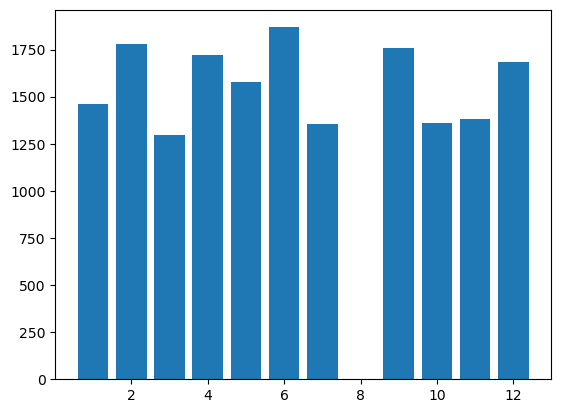

In [40]:
plt.bar(data['grab1_num'].value_counts().index, data['grab1_num'].value_counts().values)

In [41]:
a = data[data['grab1_num'].isnull()]

len(a)

271

In [42]:
a['grab1_num'].head(10)

12     NaN
13     NaN
14     NaN
582    NaN
583    NaN
584    NaN
585    NaN
586    NaN
587    NaN
1000   NaN
Name: grab1_num, dtype: float64

In [43]:
data['grab1_num'].iloc[:20]

0      5.0
1      5.0
2      5.0
3      7.0
4      7.0
5      7.0
6      4.0
7      4.0
8      4.0
9     12.0
10    12.0
11    12.0
12     NaN
13     NaN
14     NaN
15     3.0
16     3.0
17     3.0
18    12.0
19    12.0
Name: grab1_num, dtype: float64

In [44]:
data['grab1_num'].iloc[575:590]

575     1.0
576    11.0
577    11.0
578    11.0
579    11.0
580    11.0
581    11.0
582     NaN
583     NaN
584     NaN
585     NaN
586     NaN
587     NaN
588    11.0
589    11.0
Name: grab1_num, dtype: float64

In [45]:
data['grab1_num'].iloc[990:1010]

990     7.0
991     7.0
992     7.0
993     7.0
994     5.0
995     5.0
996     5.0
997     5.0
998     5.0
999     5.0
1000    NaN
1001    NaN
1002    NaN
1003    NaN
1004    NaN
1005    NaN
1006    NaN
1007    4.0
1008    4.0
1009    4.0
Name: grab1_num, dtype: float64

먼저 결측치를 갖는 행은 모두 제거한 이후 데이터셋으로 모델링 한 이후, 결측치를 예측하여 채워 넣는 식으로 진행하자.

In [46]:
data_noNull = data.dropna(axis=0)

In [47]:
data_noNull.isnull().sum()

date                                                           0
sample_time_continuous_caster                                  0
steel_type                                                     0
doc_requirement                                                0
workpiece_weight, tonn                                         0
cast_in_row                                                    0
workpiece_slice_geometry_150x150                               0
alloy_type_open                                                0
steel_weight_theoretical, tonn                                 0
metal_residue_grab1, tonn                                      0
steel_weight, tonn                                             0
grab1_num                                                      0
steel_temperature_grab1, Celsius deg.                          0
grab2_num                                                      0
resistance, tonn                                               0
swing_frequency, amount/m

In [48]:
len(data_noNull)

9757

In [49]:
data_noNull.head()

,date,sample_time_continuous_caster,steel_type,doc_requirement,"workpiece_weight, tonn",cast_in_row,workpiece_slice_geometry_150x150,alloy_type_open,"steel_weight_theoretical, tonn","metal_residue_grab1, tonn",...,"Al, %","Ca, %","N, %","Pb, %","Mg, %","Zn, %",sleeve,num_crystallizer,num_stream,RUL
0,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,18,1,1,164.2,0.4,...,0.0039,0.0007,0.0037,0.0,0.0,0.0,30013346,2,1,814.0
1,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,18,1,1,164.2,0.4,...,0.0039,0.0007,0.0037,0.0,0.0,0.0,30013350,5,2,0.0
2,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,18,1,1,164.2,0.4,...,0.0039,0.0007,0.0037,0.0,0.0,0.0,30012261,22,4,0.0
30,2020-01-05,2020-01-05 14:59:52,St3sp,Contract,161.7,6,1,1,162.1,0.4,...,0.0033,0.0011,0.0056,0.0,0.0,0.0,30013346,2,1,1148.0
31,2020-01-05,2020-01-05 14:59:52,St3sp,Contract,161.7,6,1,1,162.1,0.4,...,0.0033,0.0011,0.0056,0.0,0.0,0.0,30013350,5,2,341.0


In [50]:
data_noNull.columns

Index(['date', 'sample_time_continuous_caster', 'steel_type',
       'doc_requirement', 'workpiece_weight, tonn', 'cast_in_row',
       'workpiece_slice_geometry_150x150', 'alloy_type_open',
       'steel_weight_theoretical, tonn', 'metal_residue_grab1, tonn',
       'steel_weight, tonn', 'grab1_num',
       'steel_temperature_grab1, Celsius deg.', 'grab2_num',
       'resistance, tonn', 'swing_frequency, amount/minute',
       'crystallizer_movement, mm', 'alloy_speed, meter/minute',
       'water_consumption, liter/minute',
       'water_temperature_delta, Celsius deg.',
       'water_consumption_secondary_cooling_zone_num1, liter/minute',
       'water_consumption_secondary_cooling_zone_num2, liter/minute',
       'water_consumption_secondary_cooling_zone_num3, liter/minute',
       'quantity, tonn', 'Ce, %', 'C, %', 'Si, %', 'Mn,%', 'S, %', 'P, %',
       'Cr, %', 'Ni, %', 'Cu, %', 'As, %', 'Mo, %', 'Nb, %', 'Ti, %', 'V, %',
       'Al, %', 'Ca, %', 'N, %', 'Pb, %', 'Mg, %', 'Zn, %

In [55]:
cols = [
       'date', 
       'sample_time_continuous_caster', 
       'steel_type',
       'doc_requirement', 
       'workpiece_weight, tonn', 
       'workpiece_slice_geometry_150x150', 
       'cast_in_row',
       'alloy_type_open',
       'alloy_speed, meter/minute',
       'steel_weight_theoretical, tonn', 
       'steel_weight, tonn', 
       'grab1_num',
       'steel_temperature_grab1, Celsius deg.',
       'metal_residue_grab1, tonn', 
       'grab2_num',
       'swing_frequency, amount/minute',
       'crystallizer_movement, mm', 
       'water_consumption, liter/minute',
       'water_temperature_delta, Celsius deg.',
       'water_consumption_secondary_cooling_zone_num1, liter/minute',
       'water_consumption_secondary_cooling_zone_num2, liter/minute',
       'water_consumption_secondary_cooling_zone_num3, liter/minute', 
       'Ce, %', 'C, %', 'Si, %', 'Mn,%', 'S, %', 'P, %',
       'Cr, %', 'Ni, %', 'Cu, %', 'As, %', 'Mo, %', 'Nb, %', 'Ti, %', 'V, %',
       'Al, %', 'Ca, %', 'N, %', 'Pb, %', 'Mg, %', 'Zn, %', 
       'sleeve',
       'resistance, tonn', 
       'quantity, tonn',
       'num_crystallizer', 
       'num_stream', 
       'RUL'           # 'resistance, tonn'에서 각 'sleeve', 'num_crystallizer', 'num_stream'에 대해 가장 높은 저항 값을 빼서 구할 수 있다.
       ]

data_noNull = data_noNull[cols]

$RUL = R_{max} - R_{current}$

$R_{max}$ :  'sleeve', 'num_crystallizer', 'num_stream' 조합에서의 최고 저항값

$R_{current}$ : 각 조합에서의 현재 저항값

In [56]:
data_noNull.to_csv("./data/data_noNull.csv",index=False)